In [1]:
import sys, numpy as np, pandas as pd, sklearn, matplotlib
print("Python:", sys.version.split()[0])
print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("scikit-learn:", sklearn.__version__)
print("matplotlib:", matplotlib.__version__)


Python: 3.12.7
numpy: 2.3.4
pandas: 2.3.3
scikit-learn: 1.7.2
matplotlib: 3.10.7


In [2]:
# Step 2: Load and preview the Iris dataset

from sklearn.datasets import load_iris
import pandas as pd

# Load dataset from scikit-learn
iris = load_iris()

# Put features into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target (species) as readable names
target_map = {0: "setosa", 1: "versicolor", 2: "virginica"}
df["species"] = pd.Series(iris.target).map(target_map)

# Quick preview
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.shape()

TypeError: 'tuple' object is not callable

In [4]:
df.shape


(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Count how many samples per species
df['species'].value_counts()


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

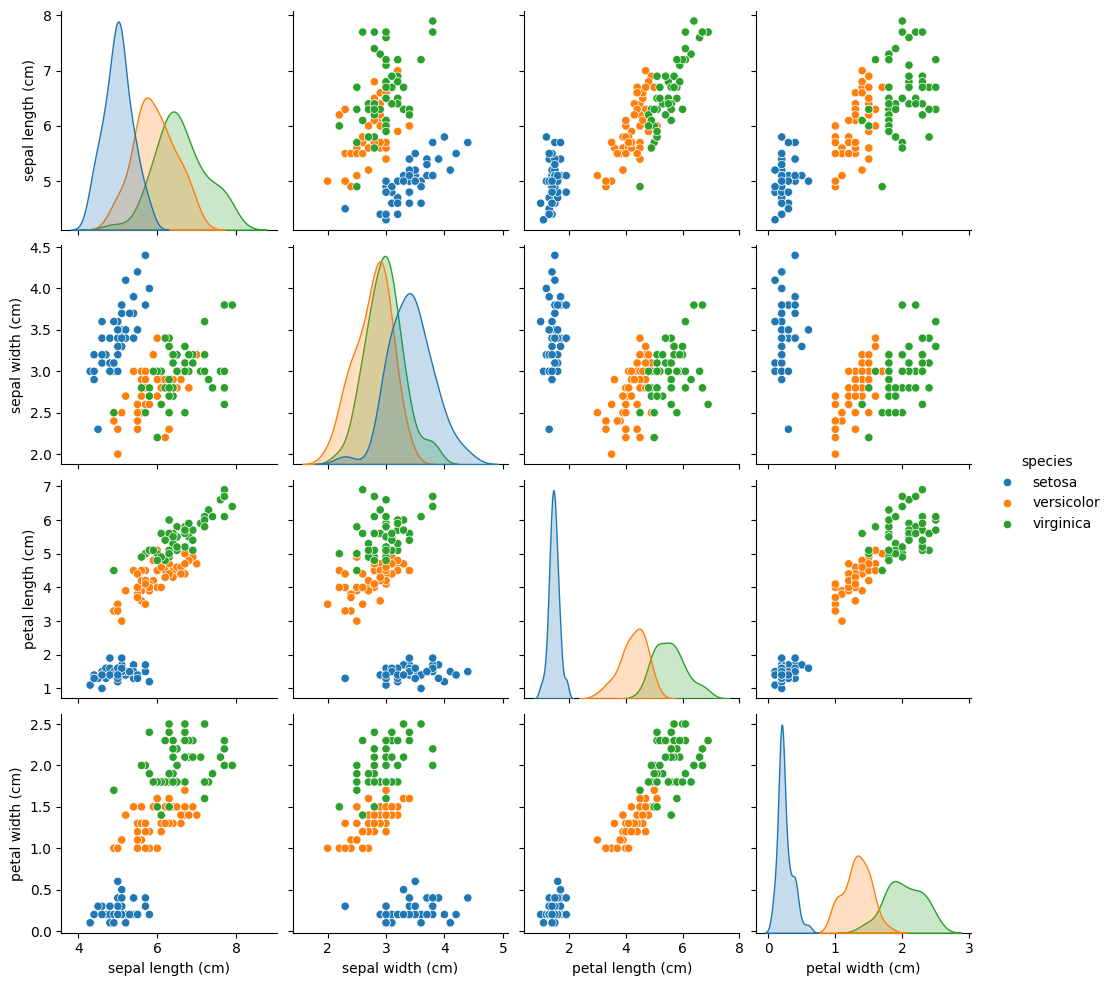

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue="species")
plt.show()


In [9]:
# Separate features (X) and target (y)
X = df.drop(columns=["species"])   # all columns except 'species'
y = df["species"]                  # the label column

# Check shapes
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (150, 4)
y shape: (150,)


In [10]:
from sklearn.model_selection import train_test_split

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Confirm the sizes
print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (120, 4)
Testing set: (30, 4)


In [11]:
from sklearn.tree import DecisionTreeClassifier

# Create a simple Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [12]:
y_pred = clf.predict(X_test)


In [13]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.3f}")


Test Accuracy: 1.000


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



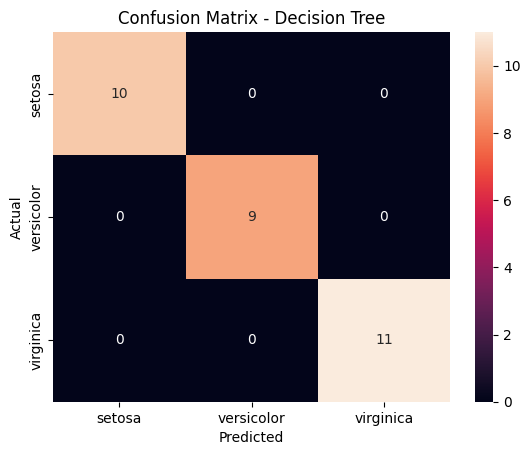

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=["setosa","versicolor","virginica"])
print("Classification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(cm, annot=True, fmt="d", xticklabels=["setosa","versicolor","virginica"], yticklabels=["setosa","versicolor","virginica"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


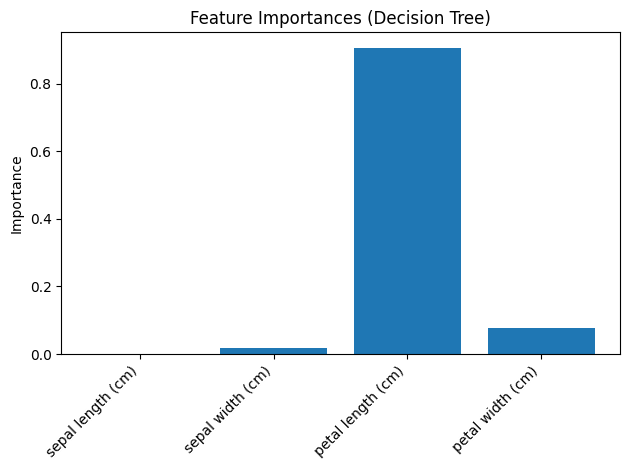

In [15]:
import matplotlib.pyplot as plt

importances = clf.feature_importances_
feat_names = X.columns

plt.bar(range(len(importances)), importances)
plt.xticks(range(len(importances)), feat_names, rotation=45, ha="right")
plt.ylabel("Importance")
plt.title("Feature Importances (Decision Tree)")
plt.tight_layout()
plt.show()


In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Create a new Decision Tree model
clf_cv = DecisionTreeClassifier(random_state=42)

# Perform 5-fold cross-validation
scores = cross_val_score(clf_cv, X, y, cv=5)

print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores).round(3))


Cross-validation scores: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Mean accuracy: 0.953


In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn_scores = cross_val_score(knn, X, y, cv=5)

print("KNN Cross-validation scores:", knn_scores)
print("KNN Mean accuracy:", np.mean(knn_scores).round(3))


KNN Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
KNN Mean accuracy: 0.967


In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{name}: mean={np.mean(scores):.3f}, std={np.std(scores):.3f}")


Decision Tree: mean=0.953, std=0.034
KNN: mean=0.973, std=0.025
SVM: mean=0.967, std=0.021
Random Forest: mean=0.967, std=0.021


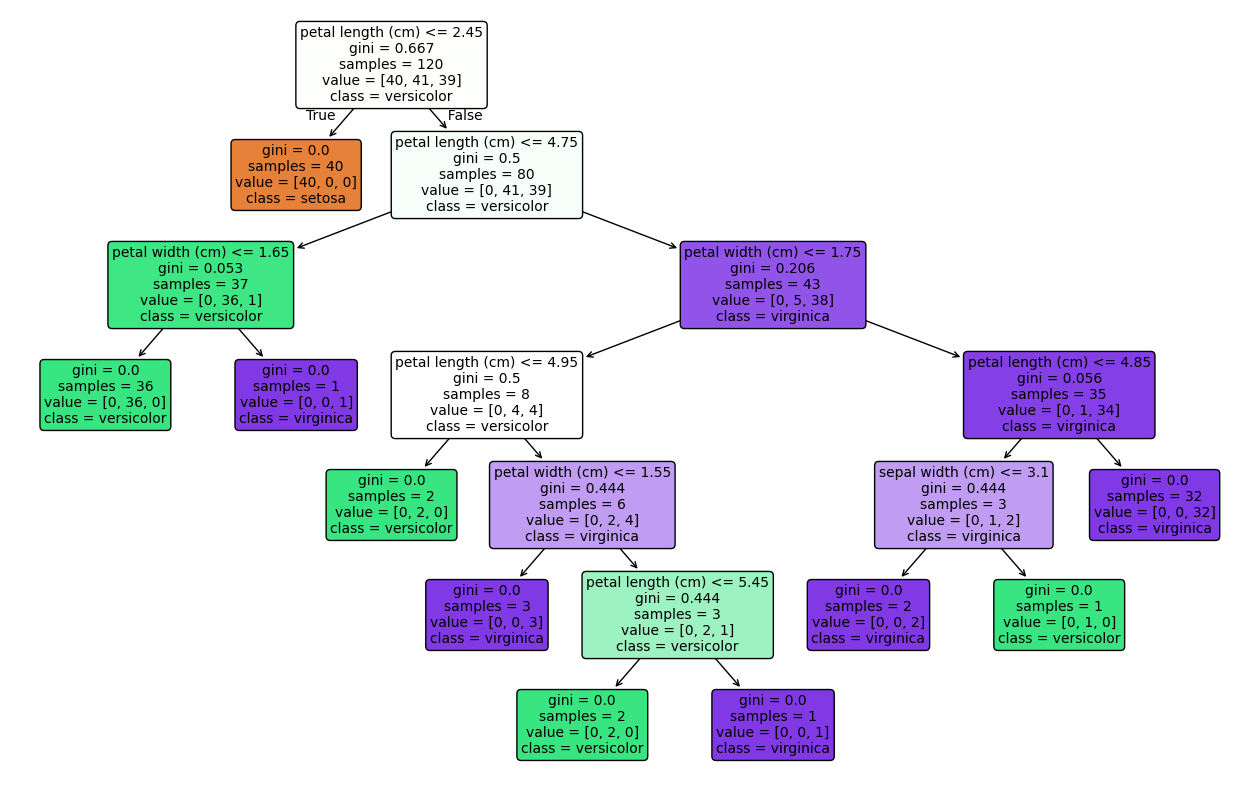

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
plot_tree(
    clf,                              # your trained Decision Tree model
    feature_names=X.columns,          # column names (inputs)
    class_names=clf.classes_,         # class labels (outputs)
    filled=True,                      # color nodes by class
    rounded=True,                     # round the boxes
    fontsize=10
)
plt.show()


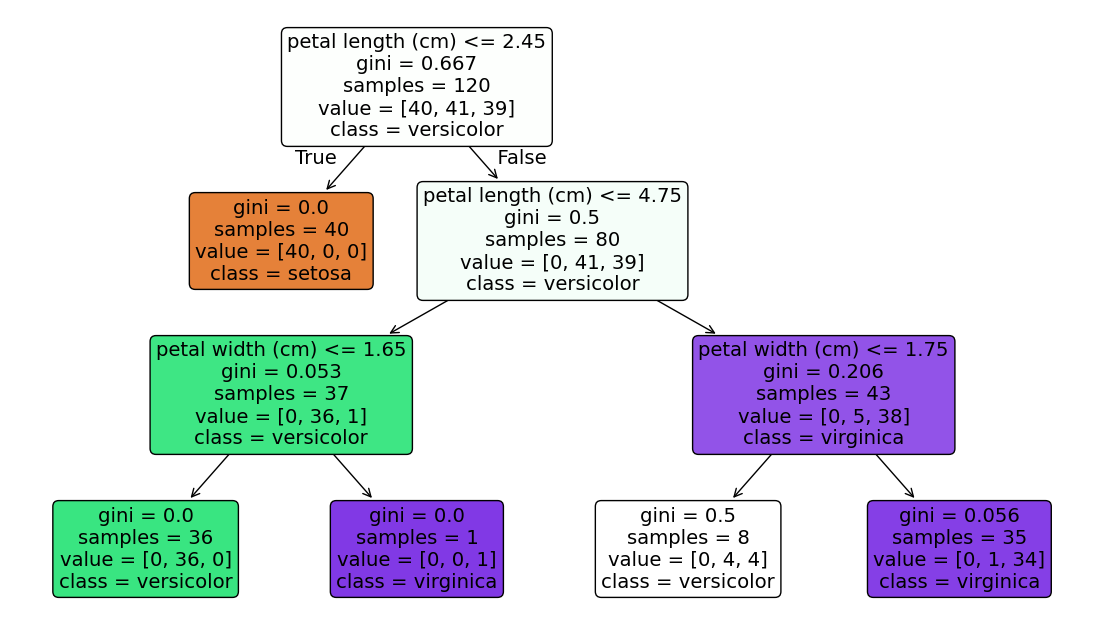

In [20]:
clf_small = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_small.fit(X_train, y_train)

plt.figure(figsize=(14, 8))
plot_tree(clf_small, feature_names=X.columns, class_names=clf_small.classes_, filled=True, rounded=True)
plt.show()


In [21]:
import joblib

# Save the model to a file
joblib.dump(clf, "iris_decision_tree_model.joblib")

print("Model saved successfully!")


Model saved successfully!


In [22]:
# Load the saved model
loaded_model = joblib.load("iris_decision_tree_model.joblib")

# Test it on a new sample (for example)
import numpy as np

# Format: [sepal length, sepal width, petal length, petal width]
sample = np.array([[5.1, 3.5, 1.4, 0.2]])
prediction = loaded_model.predict(sample)

print("Predicted species:", prediction[0])


Predicted species: setosa


c:\Users\pc\iris-classifier\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
